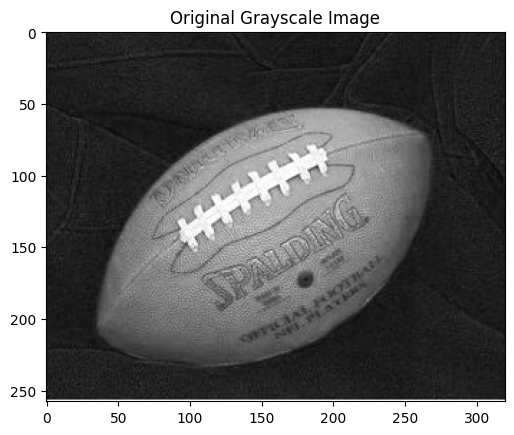

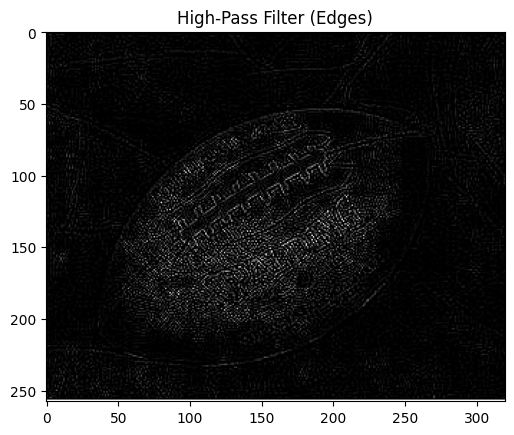

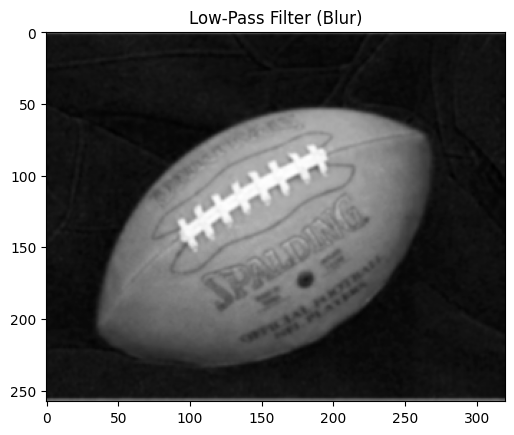

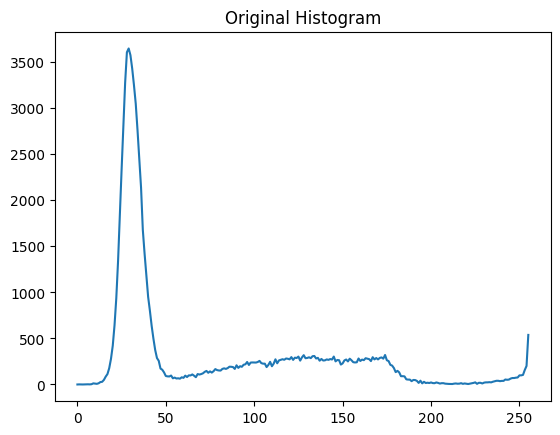

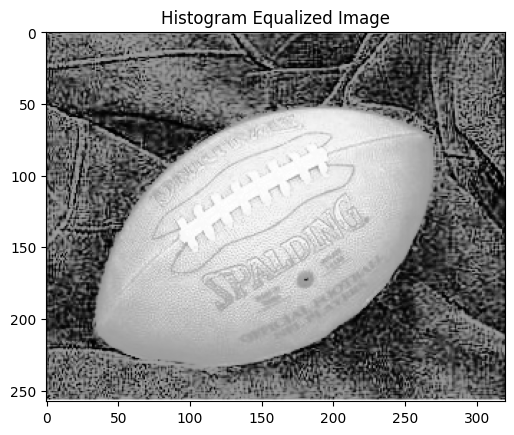

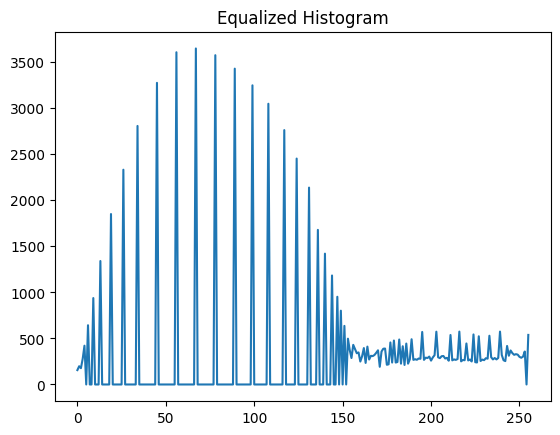

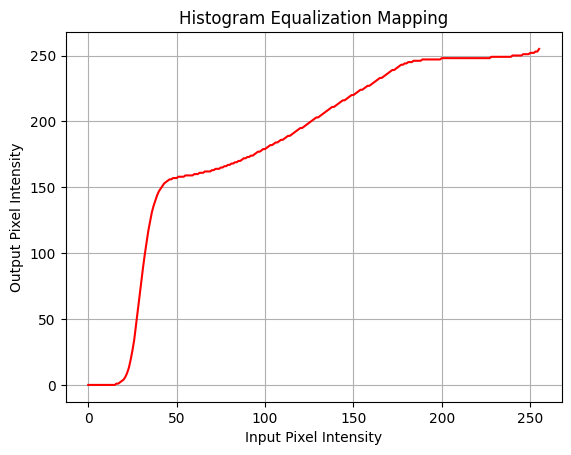

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv2.imread('footBall_orig.jpg', cv2.IMREAD_GRAYSCALE)
M, N = img.shape

# Display original image
plt.figure(), plt.imshow(img, cmap='gray'), plt.title('Original Grayscale Image')

# High-Pass Filtering (Edge Detection)
hp_filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edges = cv2.filter2D(img, -1, hp_filter)
plt.figure(), plt.imshow(edges, cmap='gray'), plt.title('High-Pass Filter (Edges)')

# Low-Pass Filtering (Blurring)
lp_filter = cv2.GaussianBlur(img, (5, 5), 1)
plt.figure(), plt.imshow(lp_filter, cmap='gray'), plt.title('Low-Pass Filter (Blur)')

# Compute Histogram
histogram, bins = np.histogram(img.flatten(), 256, [0,256])
plt.figure(), plt.plot(histogram), plt.title('Original Histogram')

# Compute Probability Distribution
pr = histogram / (M * N)

# Compute Cumulative Distribution Function (CDF)
cdf = np.cumsum(pr)
sk = np.round((255) * cdf).astype(np.uint8)

equalized_img = sk[img]
plt.figure(), plt.imshow(equalized_img, cmap='gray'), plt.title('Histogram Equalized Image')

# Compute Equalized Histogram
equalized_hist, _ = np.histogram(equalized_img.flatten(), 256, [0,256])
plt.figure(), plt.plot(equalized_hist), plt.title('Equalized Histogram')

# Input vs Output Intensity Plot
plt.figure()
plt.plot(np.arange(256), sk, color='r')
plt.xlabel('Input Pixel Intensity')
plt.ylabel('Output Pixel Intensity')
plt.title('Histogram Equalization Mapping')
plt.grid()
plt.show()


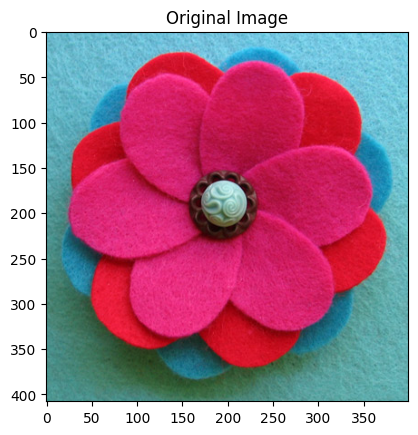

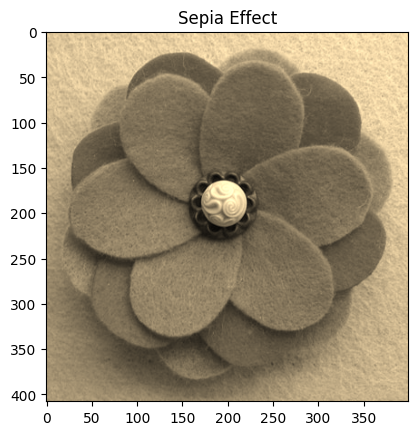

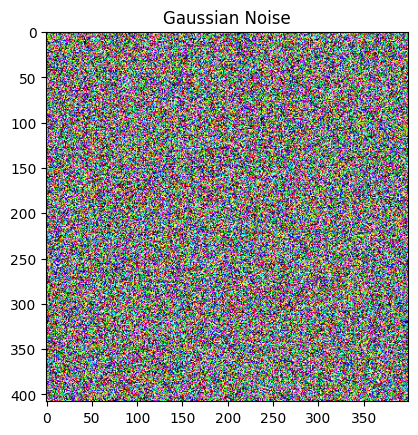

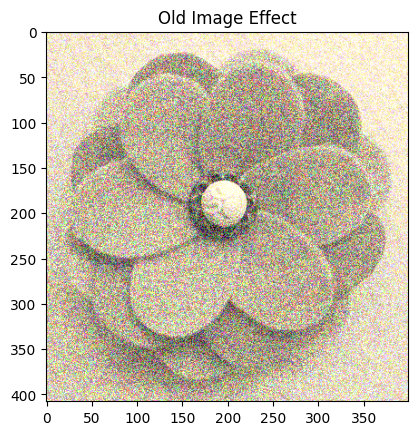

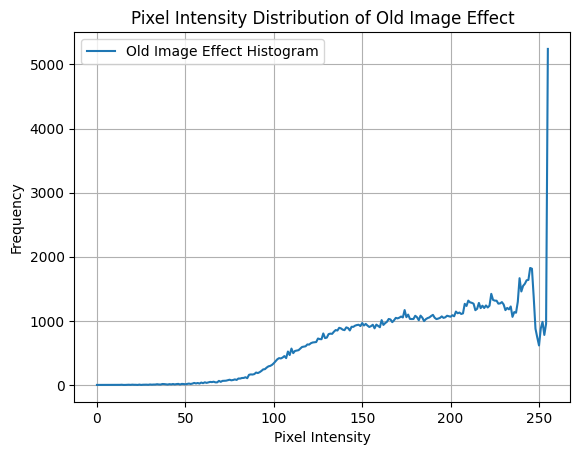

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('flower.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get image dimensions
rows, cols, _ = img.shape

# Sepia filter matrix
sepia_filter = np.array([[0.393, 0.769, 0.189],
                         [0.349, 0.686, 0.168],
                         [0.272, 0.534, 0.131]])

# Apply the sepia filter
sepia_im = np.dot(img[..., :3], sepia_filter.T)
sepia_im = np.clip(sepia_im, 0, 255).astype(np.uint8)

# Display original and sepia images
plt.figure(), plt.imshow(img), plt.title('Original Image')
plt.figure(), plt.imshow(sepia_im), plt.title('Sepia Effect')

# Generate Gaussian noise
noise = np.random.normal(0, 25, sepia_im.shape).astype(np.uint8)

# Blend sepia image with Gaussian noise
old_im = cv2.addWeighted(sepia_im.astype(np.float64), 1, noise.astype(np.float64), 0.5, 0)
old_im = np.clip(old_im, 0, 255).astype(np.uint8)

# Display Gaussian noise and old image effect
plt.figure(), plt.imshow(noise, cmap='gray'), plt.title('Gaussian Noise')
plt.figure(), plt.imshow(old_im), plt.title('Old Image Effect')

# Compute and plot pixel intensity transformation for old image effect
old_gray = cv2.cvtColor(old_im, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.plot(np.arange(256), cv2.calcHist([old_gray], [0], None, [256], [0, 256]), label='Old Image Effect Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution of Old Image Effect')
plt.legend()
plt.grid()
plt.show()


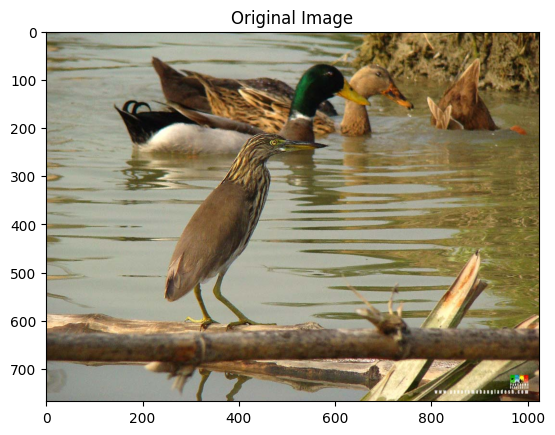

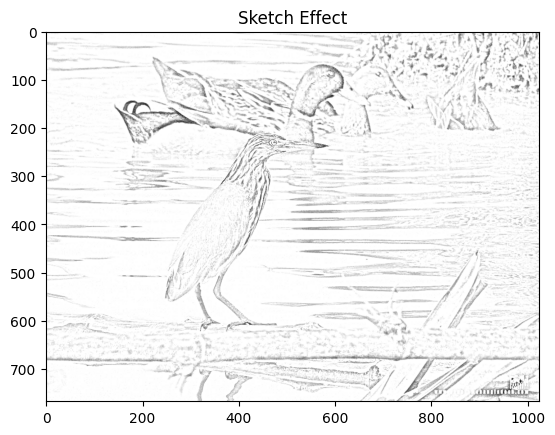

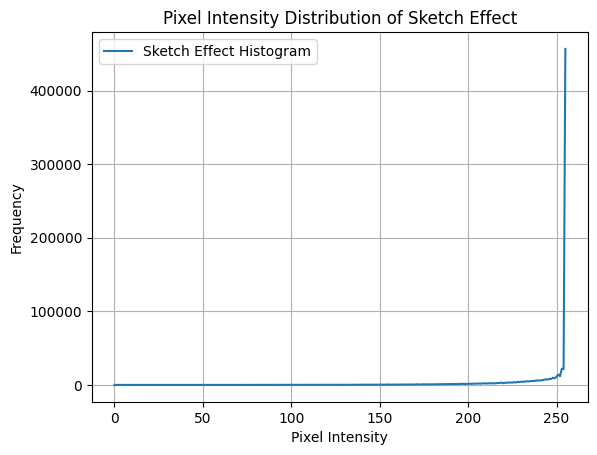

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('sketch_in.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get image dimensions
rows, cols, _ = img.shape

# Convert image to grayscale for sketch effect
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blurred_img = cv2.GaussianBlur(gray_img, (21, 21), 0)

# Create a sketch effect using division operation
sketch_img = cv2.divide(gray_img, blurred_img, scale=256)

# Display original and sketch images
plt.figure(), plt.imshow(img), plt.title('Original Image')
plt.figure(), plt.imshow(sketch_img, cmap='gray'), plt.title('Sketch Effect')

# Compute and plot pixel intensity transformation for sketch effect
plt.figure()
plt.plot(np.arange(256), cv2.calcHist([sketch_img], [0], None, [256], [0, 256]), label='Sketch Effect Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution of Sketch Effect')
plt.legend()
plt.grid()
plt.show()


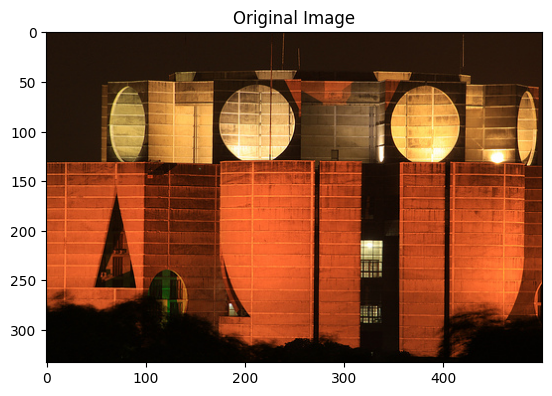

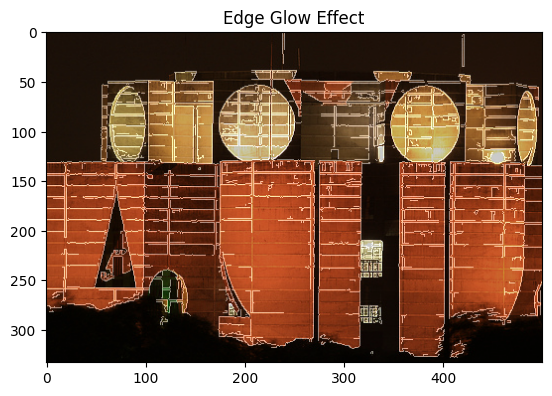

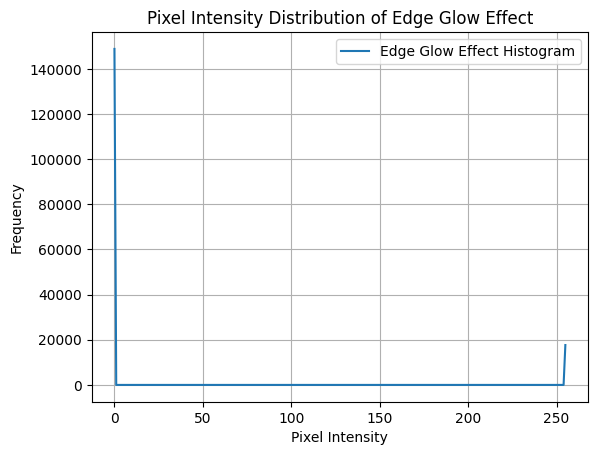

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('Edge_Glow_in.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get image dimensions
rows, cols, _ = img.shape

# Convert image to grayscale for edge glow effect
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_img, 100, 200)

# Create an edge glow effect by blending edges with the original image
edge_glow = cv2.addWeighted(img, 0.8, cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB), 0.5, 0)

# Display original and edge glow images
plt.figure(), plt.imshow(img), plt.title('Original Image')
plt.figure(), plt.imshow(edge_glow), plt.title('Edge Glow Effect')

# Compute and plot pixel intensity transformation for edge glow effect
plt.figure()
plt.plot(np.arange(256), cv2.calcHist([edges], [0], None, [256], [0, 256]), label='Edge Glow Effect Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution of Edge Glow Effect')
plt.legend()
plt.grid()
plt.show()